In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
#데이터 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

df_17_18 = pd.read_csv('/content/사업장_지정폐기물_업종별_발생량_및_처리주체별_처리현황_2017-2018.csv',encoding='euc-kr')
df_19=pd.read_csv('/content/사업장_지정폐기물_업종별_발생량_및_처리주체별_처리현황_2019.csv',encoding='euc-kr')
df_20_21 = pd.read_csv('/content/사업장_지정폐기물_업종별_발생량_및_처리주체별_처리현황_2020-2021.csv',encoding='euc-kr')

In [ ]:
#2017~2021 전자제품이 젤 많다는 그래프 나와야함 (sum 해서 구해보기)
df_17=df_17_18[df_17_18.columns[df_17_18.columns.str.startswith('2017')]]
df_18=df_17_18[df_17_18.columns[df_17_18.columns.str.startswith('2018')]]

df_20=df_20_21[df_20_21.columns[df_20_21.columns.str.startswith('2020')]]
df_21=df_20_21[df_20_21.columns[df_20_21.columns.str.startswith('2021')]]

df_17.insert(0, '업종별(1)', df_17_18['업종별(1)'])
df_18.insert(0, '업종별(1)', df_17_18['업종별(1)'])


df_20.insert(0, '구분(1)', df_20_21['구분(1)'])
df_21.insert(0, '구분(1)', df_20_21['구분(1)'])

df_17.columns = df_17.iloc[0]
df_17 = df_17.iloc[3:, [0, 2]]

df_18.columns = df_18.iloc[0]
df_18 = df_18.iloc[3:, [0, 2]]

df_19.columns = df_19.iloc[0]
df_19 = df_19.iloc[3:, [0, 1]]

df_20.columns = df_20.iloc[0]
df_20 = df_20.iloc[3:, [0, 1]]

df_21.columns = df_21.iloc[0]
df_21 = df_21.iloc[3:, [0, 1]]

Text(0.5, 1.0, '2021년도 업종별 발생량 비율')

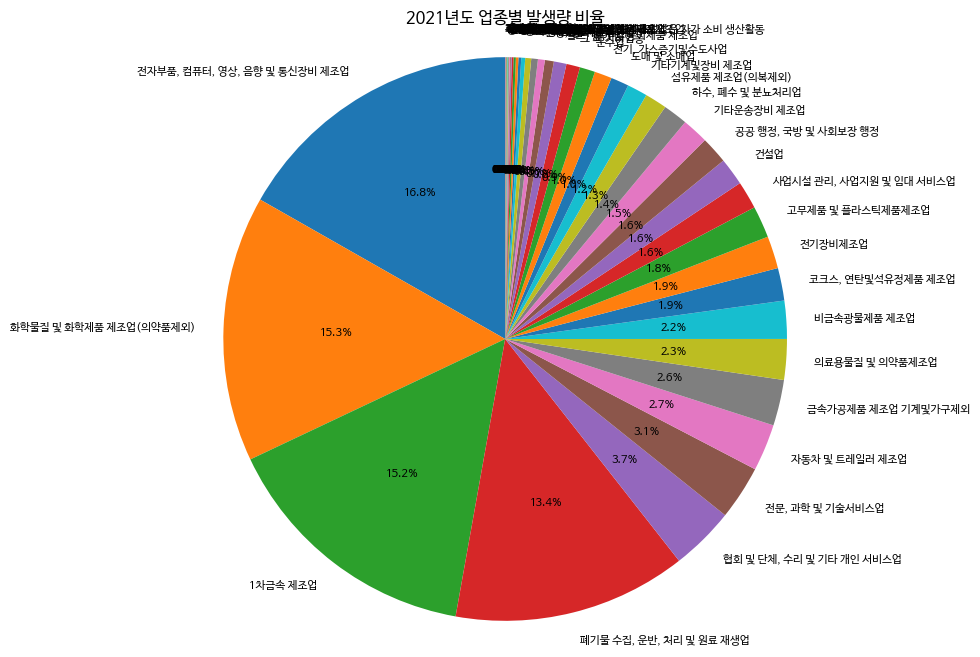

In [ ]:
#2021년도 비율 추가해서 컬럼 추가 (글자가 너무 겹쳐서 수정 필요) > 다른 년도도 적용해도 좋을듯
#그냥 여기 그래프에서 말하고 싶은거는 전자 제품 처리량이 제일 크다!!
# '총 합계' 행의 발생량 값을 전체 합으로 사용

df=df_21
df['발생량'] = df['발생량'].astype(float)
# '총 합계' 행의 발생량 값을 전체 합으로 사용
total = df.loc[df['구분(1)'] == '총 합계', '발생량'].values[0]
df['비율'] = (df['발생량'] / total) * 100
df = df[df['구분(1)'] != '총 합계']
df=df.sort_values(by="발생량",ascending=False)

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(df['발생량'], labels=df['구분(1)'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
plt.axis('equal')  # 원을 원형으로 유지
plt.title('2021년도 업종별 발생량 비율')

<ipython-input-231-cbd1fbdeb200>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['발생량'] = df['발생량'].astype(float)


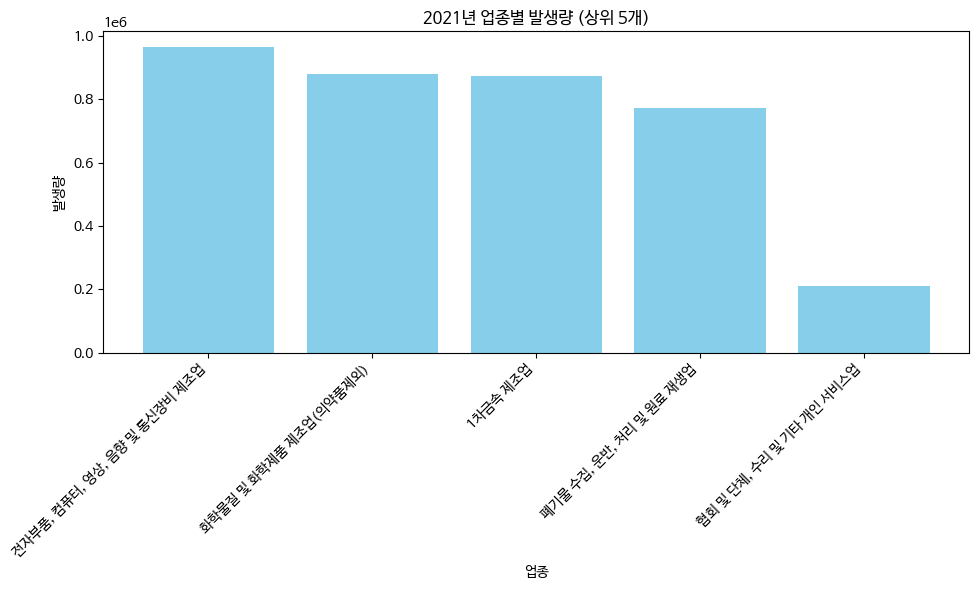

In [ ]:
#2021년도 전자제품이 젤 많다는 결론 (다른 년도도 적용해서 가능) 근데 원그래프로 비중 그리면 히스토그램은 안그려도 될듯..?
df = df_21[df_21['구분(1)'] != '총 합계']
df['발생량'] = df['발생량'].astype(float)

# '발생량'을 기준으로 내림차순 정렬 후 상위 5개 행 추출
df_top_21 = df.sort_values(by='발생량', ascending=False).head(5)

# 한국어 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기


# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(df_top_21['구분(1)'], df_top_21['발생량'], color='skyblue')
plt.xlabel('업종')
plt.ylabel('발생량')
plt.title('2021년 업종별 발생량 (상위 5개)')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()  # 그래프 간격 조절
plt.show()


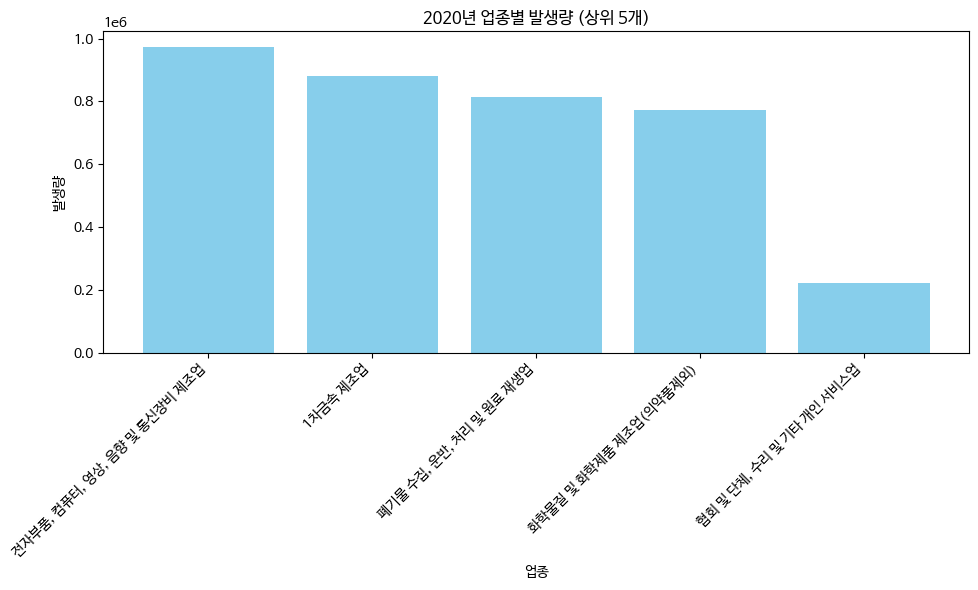

In [ ]:
#2020년도 상위 10개

df = df_20[df_20['구분(1)'] != '총 합계']
df = df[df['발생량'] != '-']
df['발생량'] = df['발생량'].astype(float)

# '발생량'을 기준으로 내림차순 정렬 후 상위 10개 행 추출
df_top_20 = df.sort_values(by='발생량', ascending=False).head(5)

# 한국어 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기


# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(df_top_20['구분(1)'], df_top_20['발생량'], color='skyblue')
plt.xlabel('업종')
plt.ylabel('발생량')
plt.title('2020년 업종별 발생량 (상위 5개)')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()  # 그래프 간격 조절
plt.show()

In [ ]:
#필요한 부분만 추출 (2017~2018년도)
# 1행부터 4행까지 추출
subset_1_to_4 = df_17_18.iloc[0:4, :]

# '업종별(1)' 열이 '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업'인 행 추출
specific_row = df_17_18[df_17_18['업종별(1)'] == '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업']

# 추출한 두 데이터프레임을 합치기
df_17_18_electronics = pd.concat([subset_1_to_4, specific_row])

#2017,18년도별 분리
# '2017'로 시작하는 컬럼 추출, 각각의 데이터프레임에 첫 번째 열 추가
df_17_electronics = df_17_18_electronics[df_17_18_electronics .columns[df_17_18_electronics .columns.str.startswith('2017')]]
df_17_electronics.insert(0, '업종별(1)', df_17_18_electronics['업종별(1)'])

# '2018'로 시작하는 컬럼 추출, 각각의 데이터프레임에 첫 번째 열 추가
df_18_electronics = df_17_18_electronics[df_17_18_electronics .columns[df_17_18_electronics .columns.str.startswith('2018')]]
df_18_electronics.insert(0, '업종별(1)', df_17_18_electronics['업종별(1)'])

# 첫 번째 행 제거후  새로운 컬럼으로 지정
df_17_electronics.columns = df_17_electronics.iloc[0]
df_17_electronics = df_17_electronics[1:]

# 첫 번째 행 제거후  새로운 컬럼으로 지정
df_18_electronics.columns = df_18_electronics.iloc[0]
df_18_electronics = df_18_electronics[1:]

In [ ]:
#2017년도 출력
df_17_electronics


,업종별(1),발생내역,발생내역,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,최종보관량
1,업종별(1),전년도 이월량,해당년도 발생량,자가처리,자가처리,자가처리,자가처리,위탁처리,위탁처리,위탁처리,위탁처리,위탁처리,소계
2,업종별(1),소계,소계,소각,매립,재활용,기타,재생처리,중간처리,최종처리,공공처리,수출,소계
3,총 합계,53405.7,5221277.3,56089.1,62099.9,145605.1,15205.4,2912624.3,851796.0,1122480.0,4428.2,0.0,104355.2
21,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",2875.7,842691.4,0.0,0.0,9878.8,6487.2,697194.6,118771.1,8615.2,2.2,0.0,4618.1


In [ ]:
#2018년도 출력
df_18_electronics

,업종별(1),발생내역,발생내역,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,최종보관량
1,업종별(1),전년도 이월량,해당년도 발생량,자가처리,자가처리,자가처리,자가처리,위탁처리,위탁처리,위탁처리,위탁처리,위탁처리,소계
2,업종별(1),소계,소계,소각,매립,재활용,기타,재생처리,중간처리,최종처리,공공처리,수출,소계
3,총 합계,37526.2,5378575.2,58063.6,100178.6,124260.2,12208.4,3244993.7,786820.6,1035870.3,1336.1,0.0,52369.8
21,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",2649.4,935682.3,0.0,0.0,7967.1,4591.2,796786.4,117260.6,6832.5,2.0,0.0,4892.0


In [ ]:
#필요한 부분만 추출 (2019년도)
df_19=pd.read_csv('/content/사업장_지정폐기물_업종별_발생량_및_처리주체별_처리현황_2019.csv',encoding='euc-kr')
# 1행부터 4행까지 추출
subset_1_to_4 = df_19.iloc[0:4, :]

# '업종별(1)' 열이 '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업'인 행 추출
specific_row = df_19[df_19['업종별(1)'] == '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업']

# 추출한 두 데이터프레임을 합치기
df_19_electronics = pd.concat([subset_1_to_4, specific_row])


# 첫 번째 행 제거후  새로운 컬럼으로 지정
df_19_electronics.columns = df_19_electronics.iloc[0]
df_19_electronics = df_19_electronics[1:]

# 결과 출력
df_19_electronics

,업종별(1),발생량,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법
1,업종별(1),소계,총계,총계,총계,총계,공공처리,공공처리,공공처리,공공처리,자가처리,자가처리,자가처리,자가처리,위탁처리,위탁처리,위탁처리,위탁처리
2,업종별(1),소계,재활용,소각,매립,기타,재활용,소각,매립,기타,재활용,소각,매립,기타,재활용,소각,매립,기타
3,총 합계,14909.9,9718.8,1660.7,2834.9,695.5,0.0,0.7,5.1,0.0,282.7,154.3,310.5,17.9,9436.1,1505.7,2519.3,677.6
22,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",2659.7,2234.1,56.8,15.3,353.5,0.0,0.0,0.0,0.0,20.4,0.0,0.0,4.3,2213.7,56.8,15.3,349.2


In [ ]:
#필요한 부분만 추출 (2020~2021년도) => 2017~2019년도와 다른점 : 업종별(1) => 구분(1)
# 1행부터 4행까지 추출
subset_1_to_4 = df_20_21.iloc[0:4, :]

# '업종별(1)' 열이 '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업'인 행 추출
specific_row = df_20_21[df_20_21['구분(1)'] == '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업']

# 추출한 두 데이터프레임을 합치기
df_20_21_electronics = pd.concat([subset_1_to_4, specific_row])

#2020,21년도별 분리
# '2020'로 시작하는 컬럼 추출, 각각의 데이터프레임에 첫 번째 열 추가
df_20_electronics = df_20_21_electronics[df_20_21_electronics .columns[df_20_21_electronics .columns.str.startswith('2020')]]
df_20_electronics.insert(0, '구분(1)', df_20_21_electronics['구분(1)'])

# '2021'로 시작하는 컬럼 추출, 각각의 데이터프레임에 첫 번째 열 추가
df_21_electronics = df_20_21_electronics[df_20_21_electronics .columns[df_20_21_electronics .columns.str.startswith('2021')]]
df_21_electronics.insert(0, '구분(1)', df_20_21_electronics['구분(1)'])

# 첫 번째 행 제거후  새로운 컬럼으로 지정
df_21_electronics.columns = df_21_electronics.iloc[0]
df_21_electronics = df_21_electronics[1:]

# 첫 번째 행 제거후  새로운 컬럼으로 지정
df_20_electronics.columns = df_20_electronics.iloc[0]
df_20_electronics = df_20_electronics[1:]

In [ ]:
#2020년도 출력
df_20_electronics

,구분(1),발생량,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법
1,구분(1),소계,총계,총계,총계,총계,공공처리,공공처리,공공처리,공공처리,자가처리,자가처리,자가처리,자가처리,위탁처리,위탁처리,위탁처리,위탁처리
2,구분(1),소계,재활용,소각,매립,기타,재활용,소각,매립,기타,재활용,소각,매립,기타,재활용,소각,매립,기타
3,총 합계,5413339.2,3574251.0,571275.6,985321.4,282491.2,0.0,270.9,6845.7,0.0,90187.1,44659.6,123665.5,5321.2,3484063.9,526345.1,854810.2,277170.0
22,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",974187.3,844901.1,21285.2,3384.4,104616.6,0.0,1.0,0.0,0.0,8364.7,0.0,0.0,723.9,836536.4,21284.2,3384.4,103892.7


In [ ]:
#2021년도 출력
df_21_electronics

,구분(1),발생량,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법,처리방법
1,구분(1),소계,총계,총계,총계,총계,공공처리,공공처리,공공처리,공공처리,자가처리,자가처리,자가처리,자가처리,위탁처리,위탁처리,위탁처리,위탁처리
2,구분(1),소계,재활용,소각,매립,기타,재활용,소각,매립,기타,재활용,소각,매립,기타,재활용,소각,매립,기타
3,총 합계,5761299.7,3903524.4,593314.3,881787.6,382673.4,0.0,343.2,6242.7,0.0,101722.8,48569.9,79836.6,31009.6,3801801.6,544401.2,795708.3,351663.8
22,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",966049.0,807466.3,24173.6,4461.0,129948.1,0.0,0.0,0.0,0.0,13047.2,0.0,0.0,1016.7,794419.1,24173.6,4461.0,128931.4


In [ ]:
#2017~2021 '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업' 발생량 및 총합계

# 2017
data_17 = float(df_17_electronics.iloc[:,2].iloc[-1])
total_17 = float(df_17_electronics.iloc[:,2].iloc[-2])
print("2017 발생량 : ",data_17,"총량 : ",total_17)

# 2018
data_18 = float(df_18_electronics.iloc[:,2].iloc[-1])
total_18 = float(df_18_electronics.iloc[:,2].iloc[-2])
print("2018 발생량 : ",data_18,"총량 : ",total_18)

# 2019
data_19 = float(df_19_electronics.iloc[:,1].iloc[-1])
total_19 = float(df_19_electronics.iloc[:,1].iloc[-2])
print("2019 발생량 : ",data_19,"총량 : ",total_19)


# 2020
data_20 = float(df_20_electronics.iloc[:,1].iloc[-1])
total_20 = float(df_20_electronics.iloc[:,1].iloc[-2])
print("2020 발생량 : ",data_20,"총량 : ",total_20)

# 2021
data_21 = float(df_21_electronics.iloc[:,1].iloc[-1])
total_21 = float(df_21_electronics.iloc[:,1].iloc[-2])
print("2021 발생량 : ",data_21,"총량 : ",total_21)

2017 발생량 :  842691.4 총량 :  5221277.3
2018 발생량 :  935682.3 총량 :  5378575.2
2019 발생량 :  2659.7 총량 :  14909.9
2020 발생량 :  974187.3 총량 :  5413339.2
2021 발생량 :  966049.0 총량 :  5761299.7


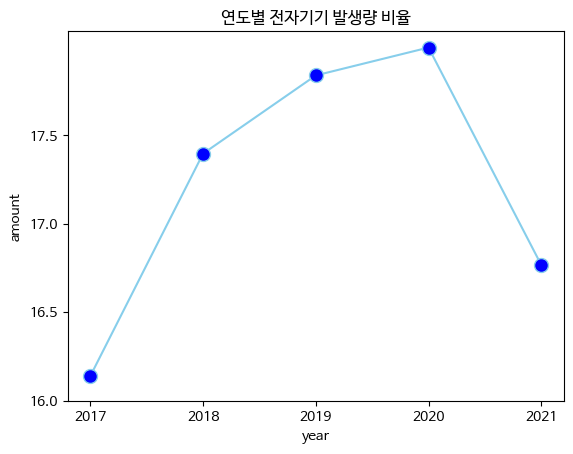

In [ ]:
#발생비율 (전자기기 업종이 2019년도에 확 떨어지는 감이 있어서 비율로했음)
#연도별 전체 발생량 중에 '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업'의 비율
ratio_17 = (data_17/total_17)*100
ratio_18 = (data_18/total_18)*100
ratio_19 = (data_19/total_19)*100
ratio_20 = (data_20/total_20)*100
ratio_21 = (data_21/total_21)*100

list_x = ['2017', '2018', '2019', '2020', '2021']
list_y = [ratio_17,ratio_18,ratio_19,ratio_20,ratio_21]

plt.plot(list_x, list_y,
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=10)

plt.title('연도별 전자기기 발생량 비율')
plt.xlabel('year')
plt.yticks(np.arange(16, 18, 0.5))
plt.ylabel('amount')
plt.show()
plt.close()

In [ ]:
#처리방법에 따른 시각화
#2017 & 2018 은 자가처리 아니면 위탁처리임 (공공처리가 없어서) "재활용(1), 소각(2), 매립(3), 기타(4)"로 분류 (17년도 18년도가 다른 데이터와 다르게 데이터가 살짝 달라서 202X년도 데이터에 맞춤)

#추출하기 쉽게 좀 수정했음
df_17_electronics.columns = df_17_electronics.iloc[0]
df_17_electronics = df_17_electronics[1:]
df_17_electronics.columns = df_17_electronics.iloc[0]
df_17_electronics = df_17_electronics[1:]

In [ ]:
#2017 : 기타를 제외하고 재활용이 제일 높음
value_17_1=float(df_17_electronics['재활용'][1:])
value_17_2=float(df_17_electronics['소각'][1:])
value_17_3=float(df_17_electronics['매립'][1:])
value_17_4=float(df_17_electronics['기타'][1:])
#print(df_17_electronics_3)

In [ ]:
df_18_electronics.columns = df_18_electronics.iloc[0]
df_18_electronics = df_18_electronics[1:]
df_18_electronics.columns = df_18_electronics.iloc[0]
df_18_electronics = df_18_electronics[1:]

In [ ]:
#2018 : 기타를 제외하고 재활용이 제일 높음
#재활용(1), 소각(2), 매립(3), 기타(4)"로 분류
value_18_1=float(df_18_electronics['재활용'][1:])
value_18_2=float(df_18_electronics['소각'][1:])
value_18_3=float(df_18_electronics['매립'][1:])
value_18_4=float(df_18_electronics['기타'][1:])
#print(value_18_1)

In [ ]:
#2019 : 기타를 제외하고 재활용이 제일 높음
df_19_electronics.columns = df_19_electronics.iloc[0]
df_19_electronics = df_19_electronics[1:]
df_19_electronics.columns = df_19_electronics.iloc[0]
df_19_electronics = df_19_electronics[1:]

In [ ]:
df_19_electronics_1=df_19_electronics['재활용'][1:].astype(float)
value_19_1=df_19_electronics_1.iloc[-1, 0]

df_19_electronics_2=df_19_electronics['소각'][1:].astype(float)
value_19_2 = df_19_electronics_2.iloc[-1, 0]

df_19_electronics_3=df_19_electronics['매립'][1:].astype(float)
value_19_3 = df_19_electronics_3.iloc[-1, 0]

df_19_electronics_4=df_19_electronics['기타'][1:].astype(float)
value_19_4 = df_19_electronics_4.iloc[-1, 0]

In [ ]:
#2020 : 기타를 제외하고 재활용이 제일 높음
df_20_electronics.columns = df_20_electronics.iloc[0]
df_20_electronics = df_20_electronics[1:]
df_20_electronics.columns = df_20_electronics.iloc[0]
df_20_electronics = df_20_electronics[1:]

In [ ]:
#재활용(1), 소각(2), 매립(3), 기타(4)"로 분류

df_20_electronics_1=df_20_electronics['재활용'][1:].astype(float)
value_20_1 = df_20_electronics_1.iloc[-1, 0]

df_20_electronics_2=df_20_electronics['소각'][1:].astype(float)
value_20_2 = df_20_electronics_2.iloc[-1, 0]

df_20_electronics_3=df_20_electronics['매립'][1:].astype(float)
value_20_3 = df_20_electronics_3.iloc[-1, 0]

df_20_electronics_4=df_20_electronics['기타'][1:].astype(float)
value_20_4 = df_20_electronics_4.iloc[-1, 0]

#print(value_20_4)

In [ ]:
#2021
df_21_electronics.columns = df_21_electronics.iloc[0]
df_21_electronics = df_21_electronics[1:]
df_21_electronics.columns = df_21_electronics.iloc[0]
df_21_electronics = df_21_electronics[1:]

In [ ]:
df_21_electronics_1=df_21_electronics['재활용'][1:].astype(float)
value_21_1 = df_21_electronics_1.iloc[-1, 0]

df_21_electronics_2=df_21_electronics['소각'][1:].astype(float)
value_21_2 = df_21_electronics_2.iloc[-1, 0]

df_21_electronics_3=df_21_electronics['매립'][1:].astype(float)
value_21_3 = df_21_electronics_3.iloc[-1, 0]

df_21_electronics_4=df_21_electronics['기타'][1:].astype(float)
value_21_4 = df_21_electronics_4.iloc[-1, 0]

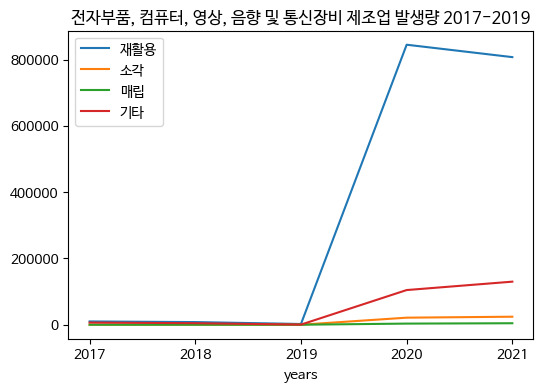

In [ ]:
#그래프 시각화 (시각화했을때 재활용이 제일 크게 나타남)
#재활용(1), 소각(2), 매립(3), 기타(4)"로 분류

# 각 항목과 년도별 값들을 리스트에 저장
years = ['2017', '2018', '2019', '2020', '2021']
recycle_values = [value_17_1, value_18_1, value_19_1, value_20_1, value_21_1]
incineration_values = [value_17_2, value_18_2, value_19_2, value_20_2, value_21_2]
landfill_values = [value_17_3, value_18_3, value_19_3, value_20_3, value_21_3]
other_values = [value_17_4, value_18_4, value_19_4, value_20_4, value_21_4]

# 그래프 그리기
plt.figure(figsize=(6, 4))

plt.plot(years, recycle_values, label='재활용')
plt.plot(years, incineration_values, label='소각')
plt.plot(years, landfill_values, label='매립')
plt.plot(years, other_values, label='기타')

plt.xlabel('years')
#plt.ylabel('값')
plt.title('전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업 발생량 2017-2021')
plt.legend()
plt.show()

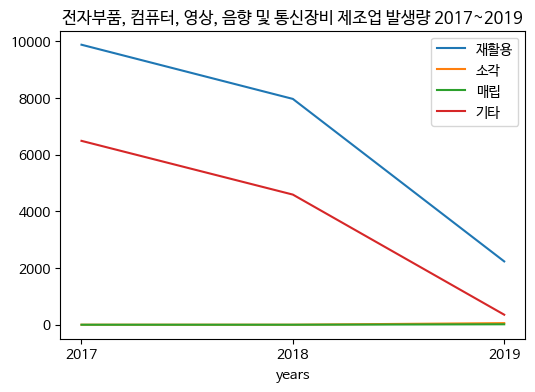

In [ ]:
#그래프 나타냈을때 17~19년도가 너무 겹쳐져서 나타나는 것 같아 17~19만 추출해서 눈금 수정후 시각화함
#그래프 시각화 (시각화했을때 재활용이 제일 크게 나타남)
#재활용(1), 소각(2), 매립(3), 기타(4)"로 분류

# 각 항목과 년도별 값들을 리스트에 저장
years = ['2017', '2018', '2019']
recycle_values = [value_17_1, value_18_1, value_19_1]
incineration_values = [value_17_2, value_18_2, value_19_2]
landfill_values = [value_17_3, value_18_3, value_19_3]
other_values = [value_17_4, value_18_4, value_19_4]

# 그래프 그리기
plt.figure(figsize=(6, 4))

plt.plot(years, recycle_values, label='재활용')
plt.plot(years, incineration_values, label='소각')
plt.plot(years, landfill_values, label='매립')
plt.plot(years, other_values, label='기타')

plt.xlabel('years')
#plt.ylabel('값')
plt.title('전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업 발생량 2017~2019')
plt.legend()
plt.show()

##📌 분석결과
### 1) 전자부품 처리량은 2017~2021년도 제일 높음
이거 원래 sum으로 합쳐서 구할려고했는데 연도별 업종 데이터가 좀 달라서 그냥 합쳐서 안구하고 따로따로 연도별로 구함
(시각화 된거는 2021년,2020년도인데 2017-2019도 동일하게 시각화 가능)


### 2) 전자부품 처리방법에 따른 분류와 시각화 진행했을 때 재활용 처리방식이 제일 많음

> 2017 & 2018 은 자가처리 아니면 위탁처리임 (공공처리가 없어서) "재활용(1), 소각(2), 매립(3), 기타(4)"로 분류 (17년도 18년도가 다른 데이터와 다르게 데이터가 살짝 달라서 202X년도 데이터에 맞춤)

2017~2021년도 모두 동일하게 재활용이 제일 높음

😲 근데 이게 재활용은 좋은건데 문제라고 볼 수 있나?!!

재활용 시설의 부족? 소비자의 무관심?